<a href="https://colab.research.google.com/github/jcmachicao/curso_intro_nn/blob/main/intro_nn_formula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introducción a Redes Neuronales**
* Autor: José Carlos Machicao
* Licencia: [GestioDinámica](http://www.gestiodinamica.com) 2022

[Tensorflow Playground](https://playground.tensorflow.org)

In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt 

In [2]:
ruta = 'drive/My Drive/2020 2021 Proyectos/salud riesgos/'

In [94]:
dataset = pd.read_excel(ruta + 'muestra_datos_X.xlsx', sheet_name='datos_2')
dataset.shape

(100, 2)

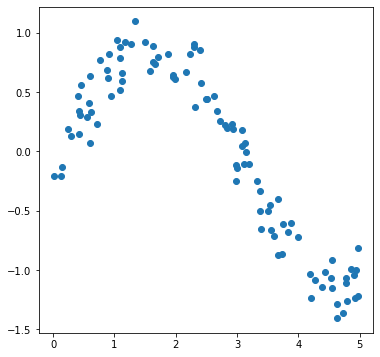

In [4]:
plt.figure(figsize=(6,6))
plt.scatter(dataset.entrada, dataset.salida)
plt.show()

In [5]:
lcol = len(dataset.columns)

In [6]:
from sklearn.preprocessing import normalize

In [7]:
data = normalize(np.array(dataset), axis=0)

In [8]:
data_X = np.array(data[:,0:lcol-1]).astype(np.float32)
data_y = np.array(data[:,-1]).reshape(-1, 1).astype(np.float32)

In [ ]:
data_X

In [80]:
X_np = data_X
y_np = data_y
X = torch.from_numpy(X_np)
y = torch.from_numpy(y_np.reshape(-1, 1))

In [81]:
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.naive_bayes import GaussianNB

In [82]:
lm = LinearRegression()
mlm = lm.fit(X_np, y_np)
nb = BayesianRidge()
mnb = nb.fit(X_np, y_np)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [83]:
pred_lm = mlm.predict(X_np)
pred_nb = mnb.predict(X_np)

In [84]:
len(X_np), len(pred_lm)

(100, 100)

In [85]:
mlm.coef_

array([[-1.5917127]], dtype=float32)

In [86]:
X.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [87]:
max(X), min(X), max(y), min(y)

(tensor([0.1687]), tensor([0.0003]), tensor([0.1514]), tensor([-0.1944]))

In [95]:
model = nn.Sequential(
  nn.Linear(lcol-1, 128),
  nn.LeakyReLU(),
  nn.Linear(128, 8),
  nn.LeakyReLU(),
  nn.Linear(8, 1),
)
criterio = nn.MSELoss()
optimizador = torch.optim.Adam(model.parameters(), lr=0.01)

In [96]:
from torch.cuda import is_available
if torch.cuda.is_available():
  print(torch.cuda.device_count())
  print(torch.cuda.get_device_name(0))
  model.cuda(0)
  X_g = X.cuda(0)
  y_g = y.cuda(0)
else:
  X_g = X
  y_g = y

1
Tesla T4


In [97]:
preds = []

In [98]:
for epo in range(50000):
  y_pred = model(X_g)
  loss = criterio(y_pred, y_g)
  loss.backward()
  optimizador.step()
  optimizador.zero_grad()
  if epo % 5000 == 0:
    print(epo, loss.item())
    pred = y_pred.cpu().detach().numpy()
    #print(pred.T)
    preds.append(pred)

0 0.011522303335368633
5000 0.0034912731498479843
10000 0.0034912729170173407
15000 0.00041407247772440314
20000 0.00039657705929130316
25000 0.00038600334664806724
30000 0.00037501705810427666
35000 0.00037140509812161326
40000 0.00037550050183199346
45000 0.0003592254070099443


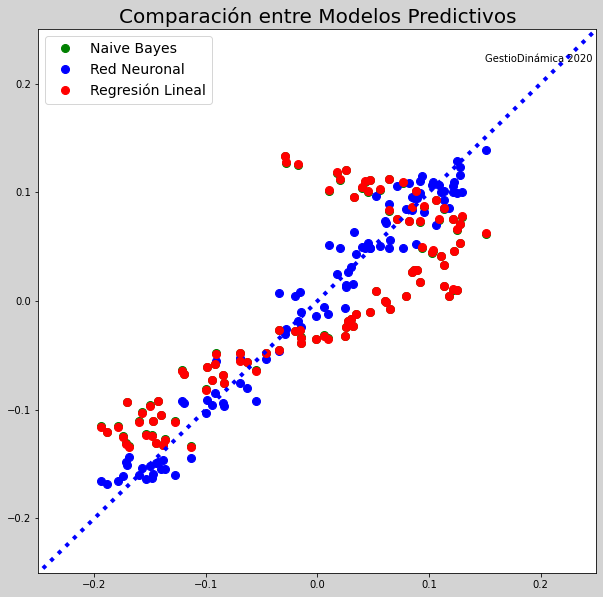

In [106]:
#@title Gráfica
plt.figure(figsize=(10,10), facecolor='lightgray')
jitter=0.0005

plt.plot(y_np, pred_nb, 'go', ms=8, label='Naive Bayes')
plt.plot(y_np, pred, 'bo', ms=8, label='Red Neuronal')
plt.plot(y_np, pred_lm, 'ro', ms=8, label='Regresión Lineal')
plt.plot([-1,1], [-1, 1], 'b:', lw=4)

plt.title('Comparación entre Modelos Predictivos', fontsize=20)
plt.legend(loc='best', fontsize=14)
plt.xlim(-0.25,0.25)
plt.ylim(-0.25,0.25)
plt.text(0.15, 0.22, 'GestioDinámica 2020')
plt.show()

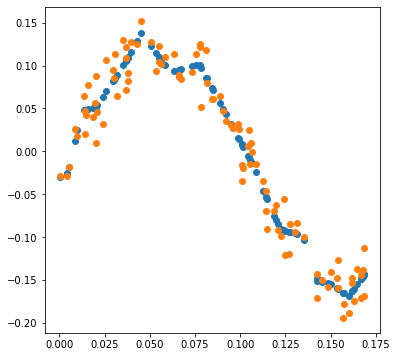

In [100]:
plt.figure(figsize=(6,6))
plt.scatter(data_X, pred)
plt.scatter(data_X, data_y)
plt.show()

### Referencias
https://medium.com/@benjamin.phillips22/simple-regression-with-neural-networks-in-pytorch-313f06910379
